# <center> Module 5 Homework
#### <center> ISE-529, Fall 2021
#### <center> Yina MA
#### <center> Due:  October 21, 2021 at 7:00PM

1)  The file "bank_evals.csv" contains data on 20 banks with the following attributes: (20 points)
- FinanciallyWeak: (1 - financially weak condition, 0 - other ) 
- CaptitalAssetRatio: Ratio of total capital to assest 
- ExpAssetRatio: Ratio of total expenses to total assets 
- LoansLeasesToAssetRatio: Ratio of total loans and leasses to total assets

a)  Create a logistic regression that models the status of the bank (whether or not it is weak) as a function of TotLns&Lses/Assets and TotExp/Assets.  Use all 20 observations as your training data. Show the resulting intercept and coefficients of your model.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [8]:
bank_evals = pd.read_csv('bank_evals.csv')
bank_evals

,FinanciallyWeak,CaptitalAssetRatio,ExpAssetRatio,LoansLeasesToAssetRatio
0,1,9.7,0.12,0.65
1,1,1.0,0.11,0.62
2,1,6.9,0.09,1.02
3,1,5.8,0.10,0.67
4,1,4.3,0.11,0.69
5,1,9.1,0.13,0.74
6,1,11.9,0.10,0.79
7,1,8.1,0.13,0.63
8,1,9.3,0.16,0.72
9,1,1.1,0.16,0.57


In [9]:
y1 = bank_evals['FinanciallyWeak'].copy()
x1 = bank_evals.drop(['FinanciallyWeak','CaptitalAssetRatio'],1).copy()

In [10]:
model1 = LogisticRegression().fit(x1,y1)

In [11]:
model1.intercept_

array([-0.47333652])

In [12]:
model1.coef_

array([[0.16075579, 0.72642506]])

In [13]:
pd.DataFrame(model1.coef_.T, columns = ['Coefficients'], index = x1.columns)

,Coefficients
ExpAssetRatio,0.160756
LoansLeasesToAssetRatio,0.726425


b)  Using the LaTex capabilities in Jupyter Notebook, write the equation of the probability of being financially weak as a function of these two predictors.

$$ a= -0.47333652 + 0.16075579*ExpAssetRatio + 0.72642506*LoansLeasesToAssetRatio $$

$$ p(Financially Weak) = e^a / (1+e^a)$$

c)  If we had a new bank whose total loans and leases to asset ratio was 0.6 and total expenses to assets ratio was 0.11, what is the probability that it would be classified as “weak” by regulatory experts? What are the odds?

In [14]:
a1= -0.47333652 + 0.16075579*0.11 + 0.72642506*0.6
import math
y_hat = 1 / (1+math.exp(-a1))
y_hat

0.49505057489466614

In [15]:
odds = y_hat / (1-y_hat)
odds

0.9803963531424897

d)  Interpret the estimated coefficient for the ratio of total leans and leasses to total assets in terms of the odds being financially weak.

As the ratio of total loans and leases to total assets increases, the odds of being financially weak increases. Also,ratio of total loans and leases to total assets has greater impact on odds being finally weak than the ratio of total expenses to assets. LoansLeasesToAssetRatio is more related to FinanciallyWeak

e)  When a weak bank is misclassified as strong, the implications of that mistake are much greater than when a strong bacnk is misclassified as weak. To minimize the effects of this, should the cutoff value be increased or decreased from a default value of 0.5?

Cutoff value should be decreased from 0.5 to reduce false negative

2)  Suppose we collect data for a group of students in a statistics class with variables ${𝑋_1=}$ hours studied, ${𝑋_2=}$ undergrad GPA, and ${Y=}$ receive an A. We fit a logistic regression and produce estimated coefficients $\hat{\beta}_0 = -6$, $\hat{\beta}_1 = 0.05$, and $\hat{\beta}_2 = 0.9$ (20 points)

$$ t=-6+0.05*x_1+0.9*x_2$$

$$ p = e^t / (1+e^t)$$

a) Estimate the probability that a student who studies for 20 hours and has an undergrad GPA of 3.5 gets an A in the class:  13.6%

In [16]:
a2 = -6+0.05*20+0.9*3.5
p2 = 1 / (1+math.exp(-a2))
p2

0.13587289700909427

b) How many hours would the student in part (a) need to study to have a 60 % chance of getting an A in the class?  65.11

In [17]:
ab = -math.log(1/0.6-1)
Hours = (ab+6-0.9*3.5)/0.05
Hours

65.10930216216329

3)  The file model_assessment_data.csv contains the output of a classification model for 100 observations.  The first column – P(Y) contains the probability that the model assigned to that observation that it contained the event.  The second column indicates whether it actually contained the event.  (60 points)

a)  Create a dataframe with the following lift curve data as columns
  - Percentile:  values from 5 to 100 by 5 (5, 10, 15, ..., 100)
  - Model lift (value at the corresponding percentile)
  - Best lift (value at the corresponding percentile)

In [20]:
model_assessment_data = pd.read_csv('model_assessment_data.csv').sort_values(by = 'P(Y)',ascending = False)
model_assessment_data = model_assessment_data.reset_index().drop('index',1)

positive = model_assessment_data.loc[model_assessment_data['Event?'] == 1]

random = [0.05 * positive['P(Y)'].count() * i for i in range(1,21)]

model = []
for i in range(5,105,5):
    model.append(model_assessment_data.head(i).loc[model_assessment_data.head(i)['Event?'] == 1]['P(Y)'].count())
    
best = [5,10,15,20,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25]

baseline = [1]*20

percentile = [str(i)+'%' for i in range(5,105,5)]


dict = {'percentile': percentile, 'random': random, 'model': model, 'best': best, 'baseline': baseline} 
    
model_frame = pd.DataFrame(dict)

model_frame['model lift'] = model_frame['model']/model_frame['random']

model_frame['best lift'] = model_frame['best']/model_frame['random']

model_frame

,percentile,random,model,best,baseline,model lift,best lift
0,5%,1.25,5,5,1,4.000000,4.000000
1,10%,2.50,9,10,1,3.600000,4.000000
2,15%,3.75,13,15,1,3.466667,4.000000
3,20%,5.00,16,20,1,3.200000,4.000000
4,25%,6.25,17,25,1,2.720000,4.000000
5,30%,7.50,18,25,1,2.400000,3.333333
6,35%,8.75,19,25,1,2.171429,2.857143
7,40%,10.00,19,25,1,1.900000,2.500000
8,45%,11.25,20,25,1,1.777778,2.222222
9,50%,12.50,21,25,1,1.680000,2.000000


b) Create a lift curve graphic using this data

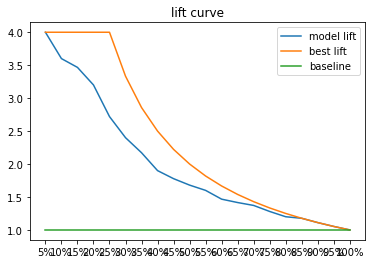

In [21]:
import matplotlib.pyplot as plt
x = model_frame['percentile']
y1 = model_frame['model lift']
y2 = model_frame['best lift']
y3 = model_frame['baseline']
plt.plot(x, y1, label = "model lift")
plt.plot(x, y2, label = "best lift")
plt.plot(x, y3, label = "baseline")
plt.legend()
plt.title('lift curve')
plt.show()

c)  Calculate and display the confusion matrix, sensitivity, and specificity with a classification threshold of 0.5.  Do not use any packages or libraries beyond what was used in class.

In [22]:
model_assessment_data['predict'] = 1
dataset = model_assessment_data.copy()
model_assessment_data.loc[model_assessment_data['P(Y)'] < 0.5, ['predict']] = 0
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(model_assessment_data['Event?'],model_assessment_data['predict'])
cnf_matrix

array([[47, 28],
       [ 4, 21]])

<AxesSubplot:>

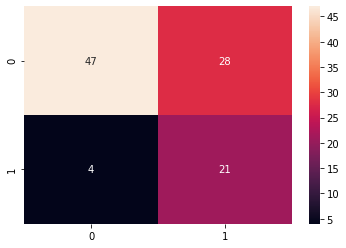

In [23]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot = True)

In [24]:
TP = cnf_matrix[1,1]
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
print ('sensitivity:' + str(TP/(TP+FN)))
print ('specificity:' + str(TN/(TN+FP)))

sensitivity:0.84
specificity:0.6266666666666667


d)  Create an ROC chart (using 1% intervals for the threshold.  Do not use any packages or libraries beyond what was used in class.

In [28]:
threshold = [0.01*i for i in range(1,101)]

x, y = [],[]

for i in threshold:
    model_assessment_data = dataset.copy()
    model_assessment_data.loc[model_assessment_data['P(Y)'] < i, ['predict']] = 0
    from sklearn import metrics
    cnf_matrix = metrics.confusion_matrix(model_assessment_data['Event?'],model_assessment_data['predict'])
    TP = cnf_matrix[1,1]
    TN = cnf_matrix[0,0]
    FP = cnf_matrix[0,1]
    FN = cnf_matrix[1,0]
    x.append(float(1-TN/(TN+FP)))
    y.append(float(TP/(TP+FN)))

ranges =  [str(i)+'%' for i in range(1,101)]

dict2 = {'Threshold': ranges, 'x': x, 'y': y} 

model_frame2 = pd.DataFrame(dict2)
model_frame2

,Threshold,x,y
0,1%,1.000000,1.00
1,2%,1.000000,1.00
2,3%,0.973333,1.00
3,4%,0.973333,1.00
4,5%,0.960000,1.00
...,...,...,...
95,96%,0.000000,0.20
96,97%,0.000000,0.12
97,98%,0.000000,0.12
98,99%,0.000000,0.00


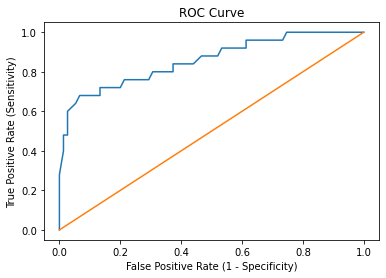

In [27]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.show()

e) What value of threshold yields the largest ROC separation?  Do not use any packages or libraries beyond what was used in class.

In [29]:
model_frame2['diff'] = model_frame2['y'] - model_frame2['x']
model_frame2['diff'].max()
maxi = model_frame2.loc[model_frame2['diff'] == model_frame2['diff'].max()]
maxi['Threshold']

84    85%
85    86%
Name: Threshold, dtype: object

f)  Recalculate the confusion matrix, sensitivity, and specificity using the optimal threshold you found in part (e):

In [30]:
model_assessment_data = dataset.copy()
model_assessment_data.loc[model_assessment_data['P(Y)'] < 0.85, ['predict']] = 0

cnf_matrix2 = metrics.confusion_matrix(model_assessment_data['Event?'],model_assessment_data['predict'])
print (cnf_matrix2)
TP2 = cnf_matrix2[1,1]
TN2 = cnf_matrix2[0,0]
FP2 = cnf_matrix2[0,1]
FN2 = cnf_matrix2[1,0]
print ('sensitivity:' + str(TP2/(TP2+FN2)))
print ('specificity:' + str(TN2/(TN2+FP2)))

[[70  5]
 [ 8 17]]
sensitivity:0.68
specificity:0.9333333333333333


<AxesSubplot:>

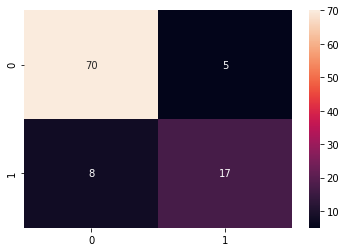

In [31]:
sns.heatmap(cnf_matrix2, annot = True)

In [32]:
model_assessment_data = dataset.copy()
model_assessment_data.loc[model_assessment_data['P(Y)'] < 0.85, ['predict']] = 0

cnf_matrix3 = metrics.confusion_matrix(model_assessment_data['Event?'],model_assessment_data['predict'])
print (cnf_matrix3)
TP3 = cnf_matrix3[1,1]
TN3 = cnf_matrix3[0,0]
FP3 = cnf_matrix3[0,1]
FN3 = cnf_matrix3[1,0]
print ('sensitivity:' + str(TP3/(TP3+FN3)))
print ('specificity:' + str(TN3/(TN3+FP3)))

[[70  5]
 [ 8 17]]
sensitivity:0.68
specificity:0.9333333333333333


<AxesSubplot:>

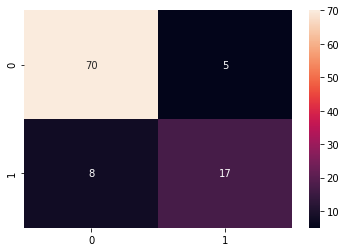

In [33]:
sns.heatmap(cnf_matrix3, annot = True)